In the "Overview of Recursion" and "Binary Trees files," we learned how to implement AVL trees. We can use this data structure to query data efficiently. With our implementation, we can add and lookup data in *O(log(N))*, where *N* is the number of data points.

In general, these trees also allow us to delete data and answer [range queries](https://en.wikipedia.org/wiki/Range_query_(database)#:~:text=A%20range%20query%20is%20a,3%20to%205%20years'%20experience.) efficiently. The order properties that we maintained on the nodes make this possible. The values on the left are always smaller, and the values on the right are larger.

In this file, we'll study another tree data structure: a **heap**. The [heap data structure](https://en.wikipedia.org/wiki/Heap_(data_structure)) is designed for keeping the minimum or maximum value of a dataset in constant time, and it has many applications.

In data engineering, we use it as a task scheduler when tasks have priorities. We assign priorities to the tasks and add them to the heap so that the highest priority task is always accessible. In data science, we can use it to calculate [order statistics](https://en.wikipedia.org/wiki/Order_statistic) on the data. Its applications are much broader, though. For example, we use heaps in algorithms to calculate the shortest routes in our GPS.

In this file, we'll learn how to implement a **min-heap**. A min-heap is a heap designed to retrieve minimums. We'll see in the end how to change it to keep maximums instead.

A min-heap is also a binary tree but with different properties. We'll enforce the order property that the value of each node must be smaller than or equal to the value of its left and right children. The following figure illustrates this:

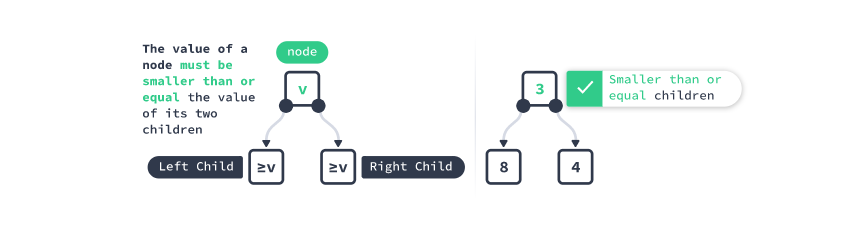

The left part of the diagram shows the general rule, while the right part of the diagram presents a concrete example.

**Task**

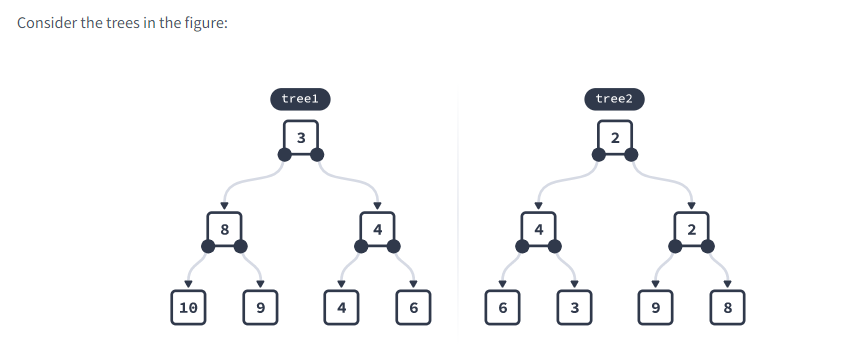

1. If we think that **tree1** is a min-heap, assign to a variable named `tree1` the Boolean `True`. Otherwise, assign it the value `False`.
2. If we think that `tree2` is a min-heap, assign to a variable named `tree2` the Boolean `True`. Otherwise, assign it the value `False`.

**Answer**



In [1]:
tree1 = True
tree2 = False

In the previous file, we used a node class to represent nodes. For heaps, we'll learn a different approach using a list. Instead of storing nodes, the idea is to store the values in a list in a level-by-level order. Here's an example:

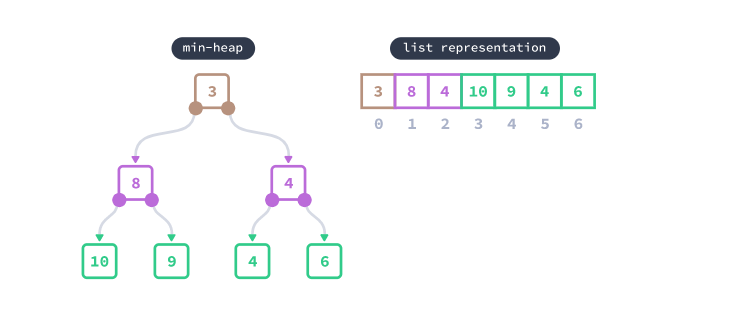

If we appended a new value to the list, it would correspond to adding a left child to the node with value 10. Appending yet another value will fill the right child, and so on. The following animation illustrates this relationship:

In [2]:
from IPython.display import Image

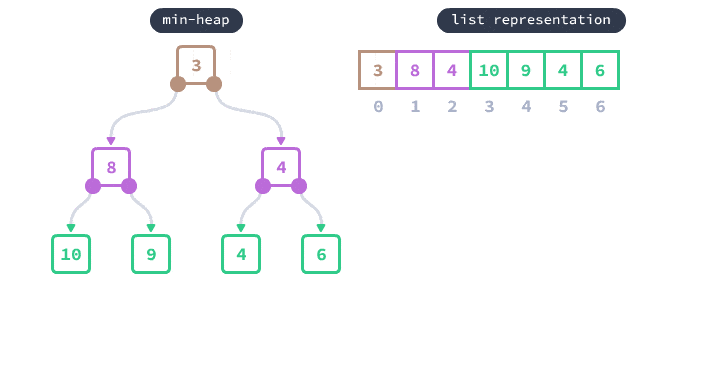

In [3]:
Image("2.2-m230.gif")

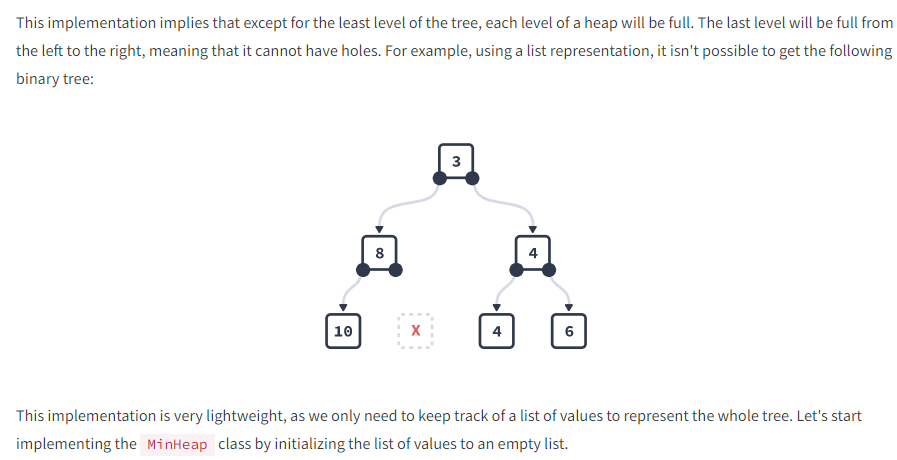

**Task**

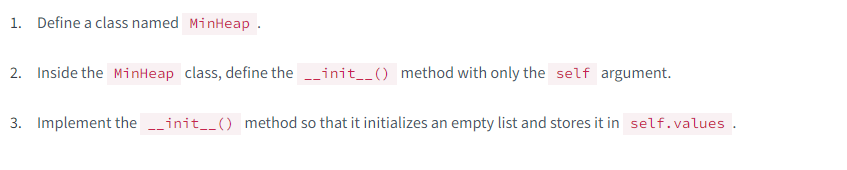

**Answer**

In [4]:
class MinHeap:
    
    def __init__(self):
        self.values = []

Abvoe we've learned that we can represent a binary tree using a list. Now we'll learn how we can access the children of a node when using a list representation.

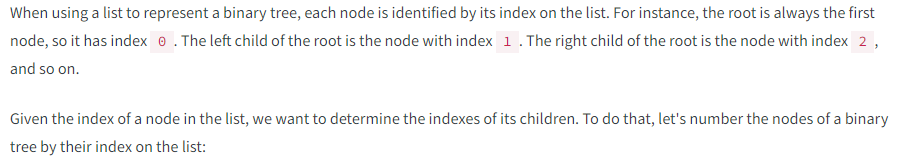

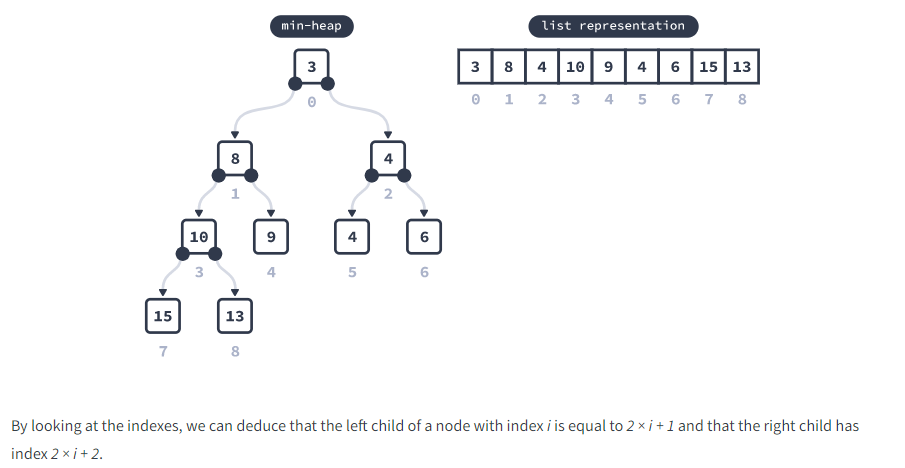

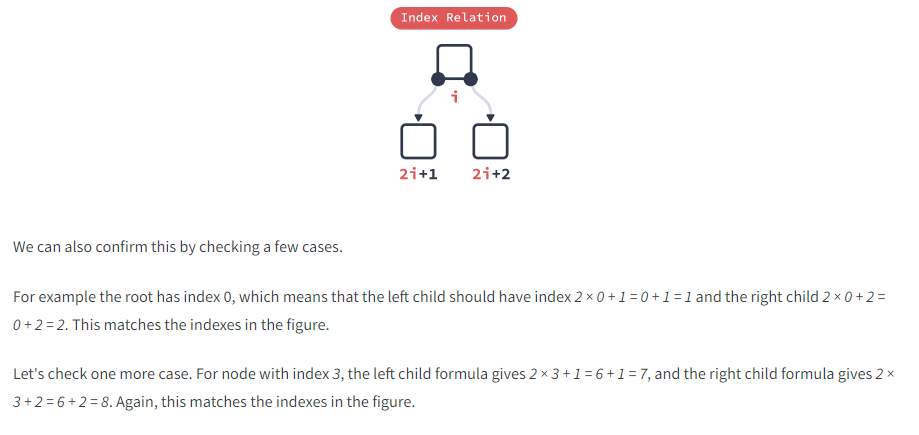

Let's implement two methods that given a node index, return the indexes of the left and right child of that node. We will prefix the method names with an underscore because outsiders using our heap won't need to use them directly.

**Task**

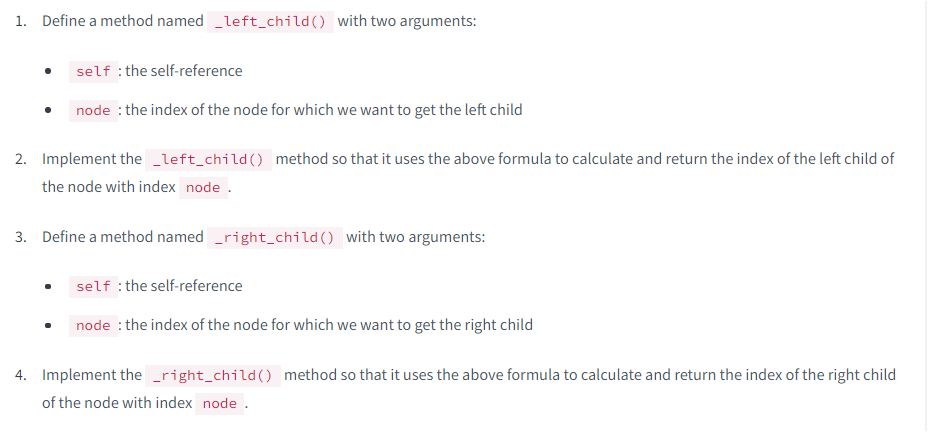

**Answer**

In [5]:
class MinHeap:
    
    def __init__(self):
        self.values = []
        
    def _left_child(self, node):
        return 2 * node + 1

    def _right_child(self, node):
        return 2 * node + 2

Above we learned two formulas to calculate the left and right child indexes, given the parent index. Now we'll do the reverse: given the index of a node, we'll calculate the index of its parent.

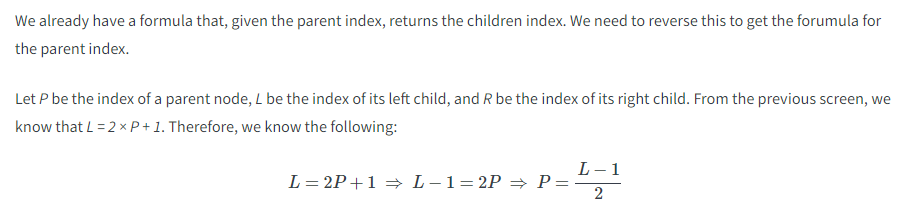

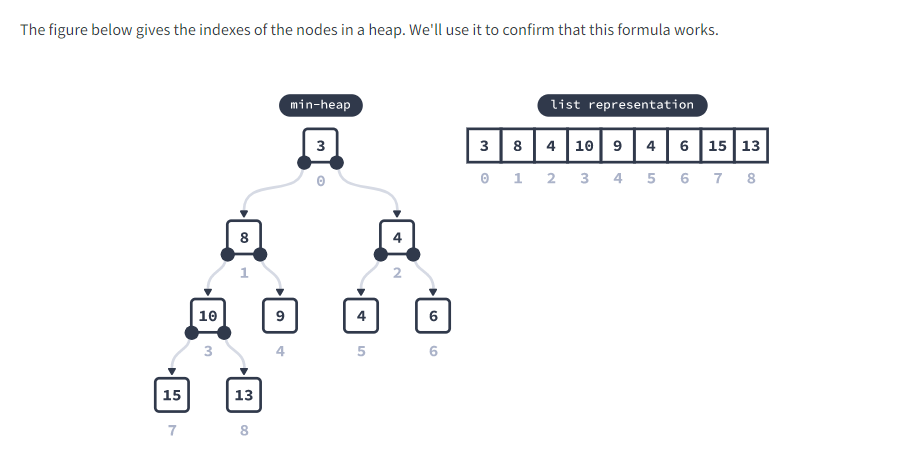

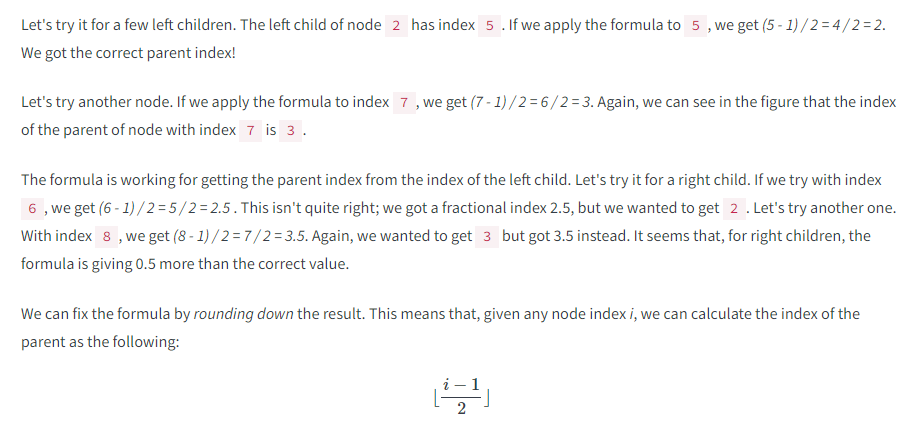

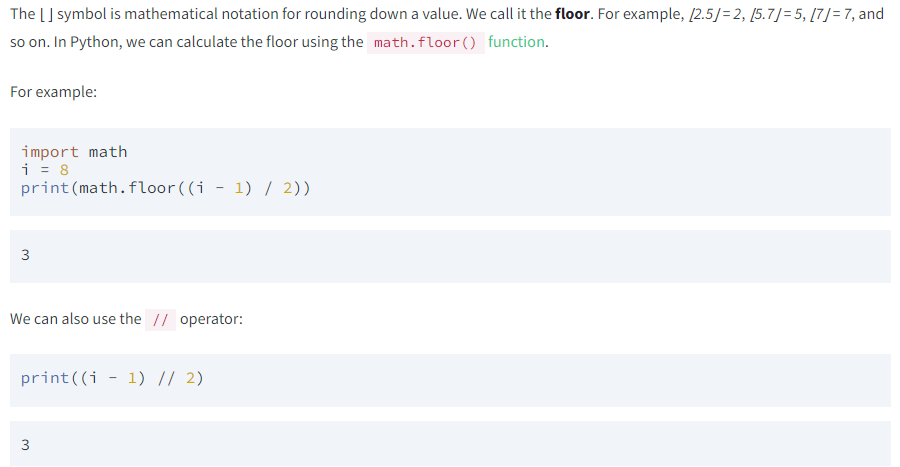

Let's use this to implement a method that, given a node index, returns the parent index.

**Task**

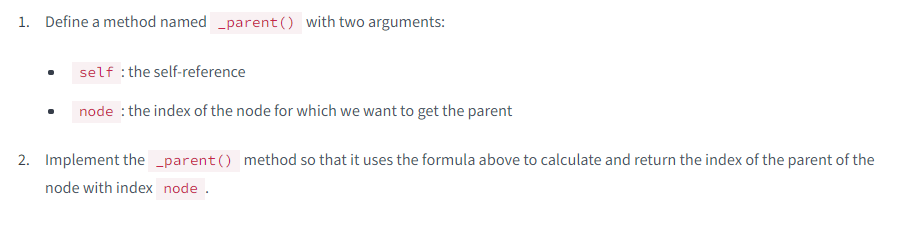

**Answer**

In [6]:
class MinHeap:
    
    def __init__(self):
        self.values = []
        
    def _left_child(self, node):
        return 2 * node + 1

    def _right_child(self, node):
        return 2 * node + 2
    
    def _parent(self, node):
        return (node - 1) // 2

# If we want to use math.floor instead, we need to:
# 1. import the math module
# 2. Use return the value: math.floor((node - 1) / 2)

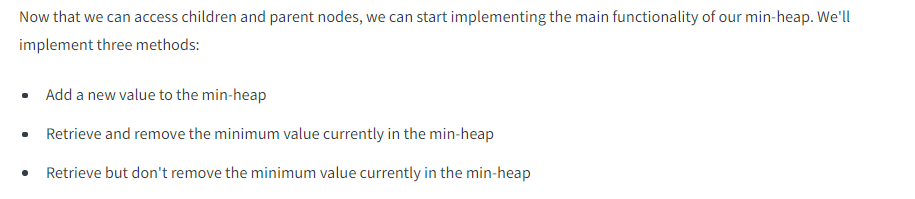

Now we'll focus on adding a new value. To add a new value to a min-heap, we start by appending it to the list to create a new node for it. However, this isn't enough; remember that in a min-heap, the value of a node must always be smaller than or equal to the value of its two children:

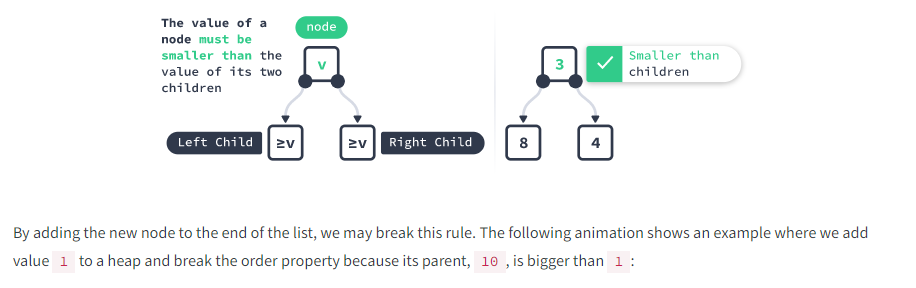

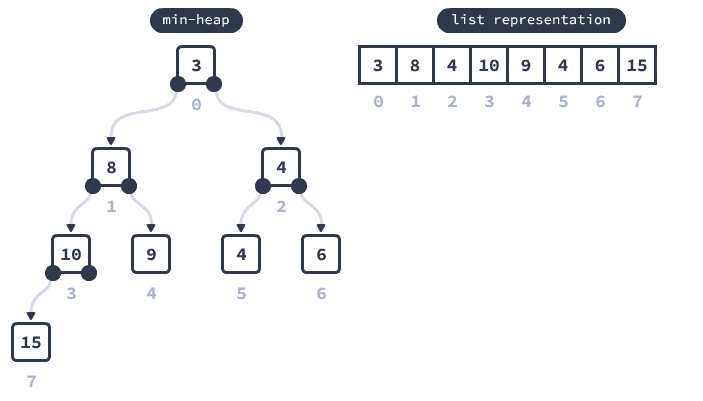

In [7]:
Image("5.2-m230.gif")

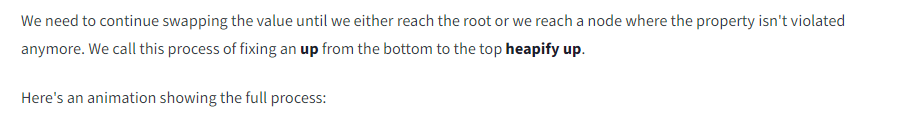

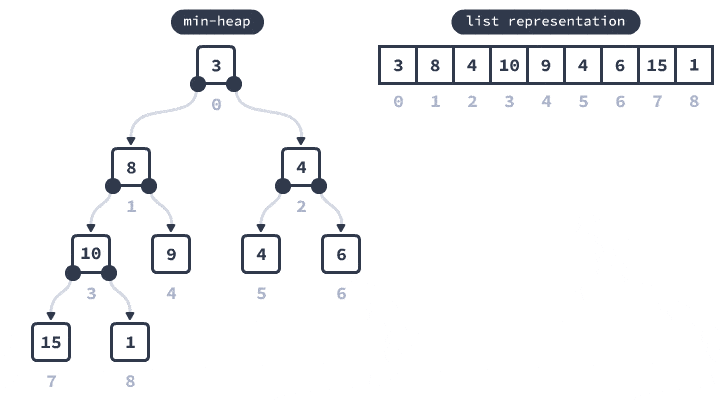

In [8]:
Image("5.4-m230.gif")

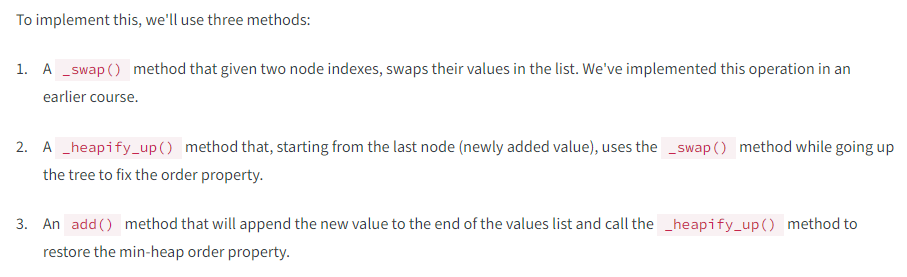

We've provided with the `_swap()` and `add()` methods. Our goal is to implement the `_heapify_up()` method. Since this method repeatedly applies the same operation to the nodes going up the tree, we recommended doing a recursive implementation.

**Task**

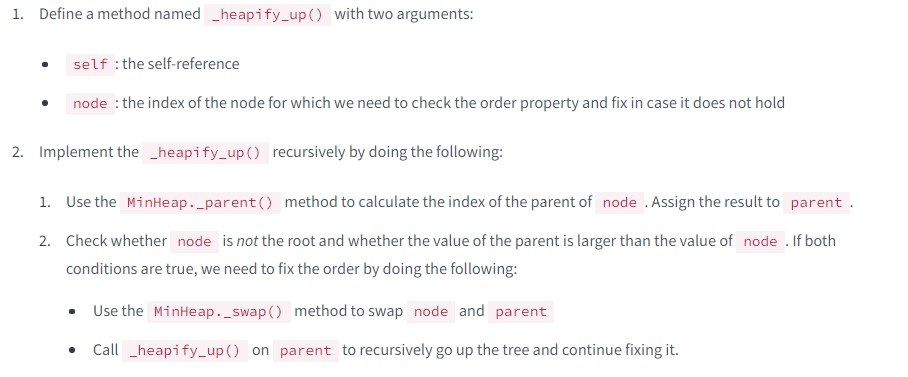

**Answer**

In [9]:
class MinHeap:
    
    def __init__(self):
        self.values = []
        
    def _left_child(self, node):
        return 2 * node + 1

    def _right_child(self, node):
        return 2 * node + 2
    
    def _parent(self, node):
        return (node - 1) // 2

    def _swap(self, node1, node2):
        tmp = self.values[node1]
        self.values[node1] = self.values[node2]
        self.values[node2] = tmp

    def add(self, value):
        self.values.append(value)
        self._heapify_up(len(self.values) - 1)
    
    # Add method here
# Answer
class MinHeap:
    
    def __init__(self):
        self.values = []
        
    def _left_child(self, node):
        return 2 * node + 1

    def _right_child(self, node):
        return 2 * node + 2
    
    def _parent(self, node):
        return (node - 1) // 2

    def _swap(self, node1, node2):
        tmp = self.values[node1]
        self.values[node1] = self.values[node2]
        self.values[node2] = tmp

    def add(self, value):
        self.values.append(value)
        self._heapify_up(len(self.values) - 1)
    
    def _heapify_up(self, node):
        parent = self._parent(node)
        if node > 0 and self.values[parent] > self.values[node]:
            self._swap(node, parent)
            self._heapify_up(parent)

Now we'll implement a function that retrieves the minimum values of a min-heap. Because of the order properties, each node has a value that is smaller than or equal to the value of its children. Therefore, the minimum value must always be the root value.

Let's implement a method that returns this value.

**Task**

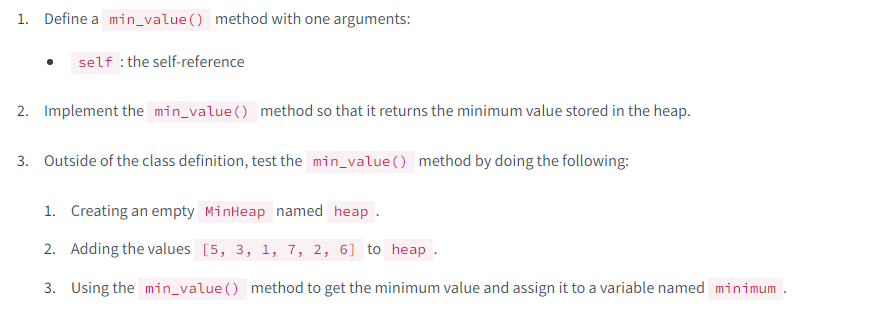

**Answer**

In [10]:
class MinHeap:
    
    def __init__(self):
        self.values = []
        
    def _left_child(self, node):
        return 2 * node + 1

    def _right_child(self, node):
        return 2 * node + 2
    
    def _parent(self, node):
        return (node - 1) // 2

    def _swap(self, node1, node2):
        tmp = self.values[node1]
        self.values[node1] = self.values[node2]
        self.values[node2] = tmp

    def add(self, value):
        self.values.append(value)
        self._heapify_up(len(self.values) - 1)
    
    def _heapify_up(self, node):
        parent = self._parent(node)
        if node > 0 and self.values[parent] > self.values[node]:
            self._swap(node, parent)
            self._heapify_up(parent)
    
    
    def min_value(self):
        return self.values[0]


heap = MinHeap()
for value in [5, 3, 1, 7, 2, 6]:
    heap.add(value)
minimum = heap.min_value()

Now we'll finalize our min-heap implementation by adding a method that removes and returns the minimum value.

We already know that the minimum is located at the root. However, we can't just remove it and leave a hole in the tree. We need to find a new value to replace it. We do this by swapping the root value with the last value in the list.

This ensures that we don't create any holes in the heap and that each level of the tree remains full (except for the last one which must be full from left to right). However, similar to value addition, this operation may break the order property.

The following animation shows the result:

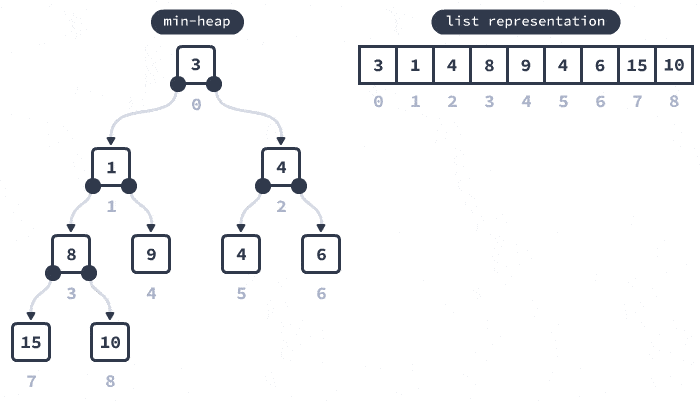

In [11]:
Image("7.1-m230.gif")

After swapping the root with the last node and removing it from the list, we get a heap with the correct structure (full level by level), but it might not respect the order properties.

To fix the order property, we need to go down the tree. We'll swap each node with one of its children. But which child do we swap? To make sure that this swap doesn't break the order property, we need to swap it with the child that has the smallest value.

We do this down the tree until we reach either a leaf or a node where the order property is correct. The following animation illustrates this process as a continuation of the previous example:

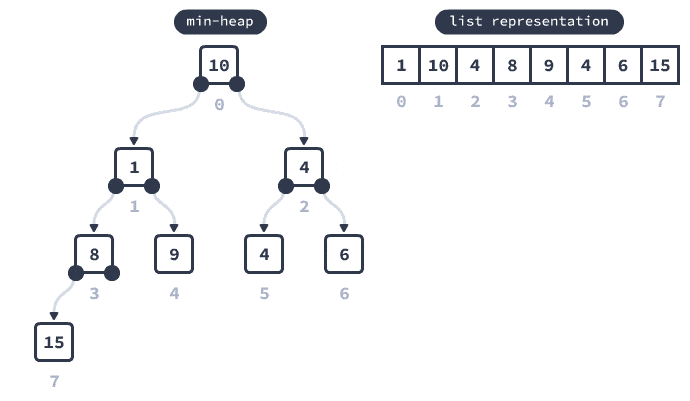

In [12]:
Image("7.2-m230.gif")

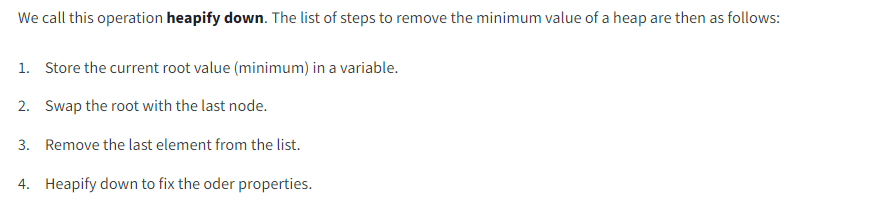

We've provided with a method that performs the four steps. Our task is to implement the heapify down method.

Note that when we reach the bottom of the tree, the left or right children might not exist. We can detect this by comparing the child index with the length of self.values. If the child index is bigger than or equal to the length of self.values, it means that the child doesn't exist.

**Task**

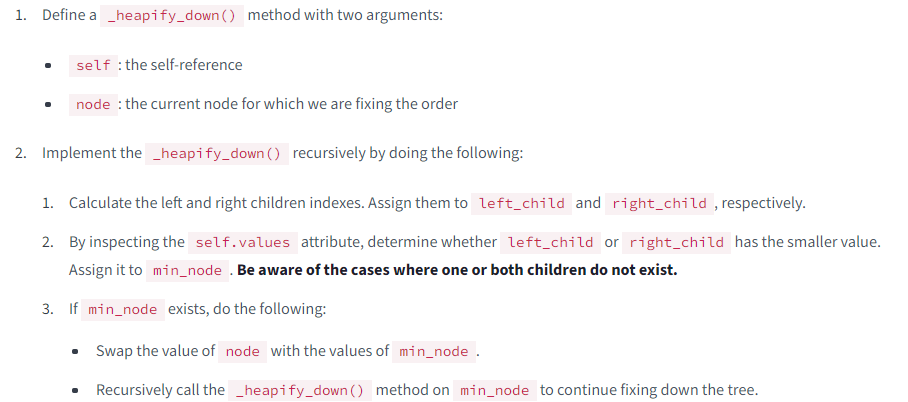

**Answer**

In [13]:
class MinHeap:
    
    def __init__(self):
        self.values = []
        
    def _left_child(self, node):
        return 2 * node + 1

    def _right_child(self, node):
        return 2 * node + 2
    
    def _parent(self, node):
        return (node - 1) // 2

    def _swap(self, node1, node2):
        tmp = self.values[node1]
        self.values[node1] = self.values[node2]
        self.values[node2] = tmp

    def add(self, value):
        self.values.append(value)
        self._heapify_up(len(self.values) - 1)
    
    def _heapify_up(self, node):
        parent = self._parent(node)
        if node > 0 and self.values[parent] > self.values[node]:
            self._swap(node, parent)
            self._heapify_up(parent)
            
    def min_value(self):
        return self.values[0]
    
    def pop(self):
        self._swap(0, len(self.values) - 1)
        ret_value = self.values.pop()
        self._heapify_down(0)
        return ret_value
    
    def _heapify_down(self, node):
        left_child = self._left_child(node)
        right_child = self._right_child(node)
        min_node = node
        if left_child < len(self.values) and self.values[left_child] < self.values[node]:
            min_node = left_child
        if right_child < len(self.values) and self.values[right_child] < self.values[min_node]:
            min_node = right_child
        if min_node != node:
            self._swap(node, min_node)
            self._heapify_down(min_node)

Congratulations on implementing a min-heap!

Let's finish this file by calculating the time complexity of heap operations. A heap is a binary tree in which each level, except for the last one, is full. This means that a heap must be balanced. As we've learned, this means that its height is *O(log(N))*, where N is the number of values in the heap.

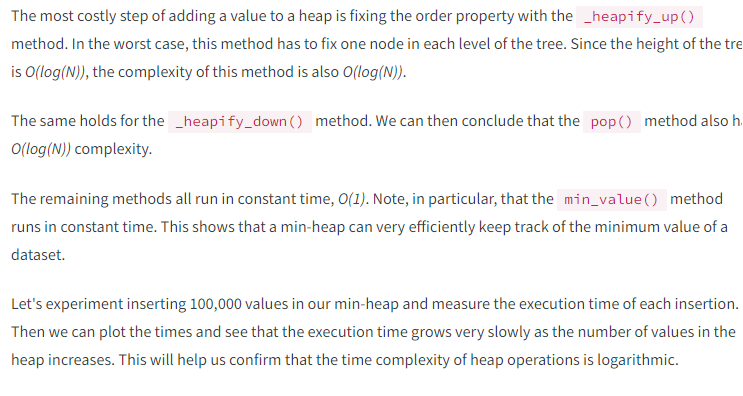

**Task**

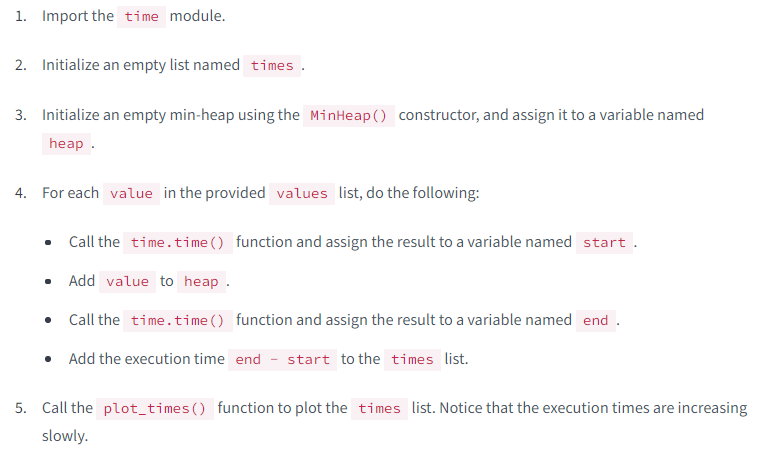

**Answer**

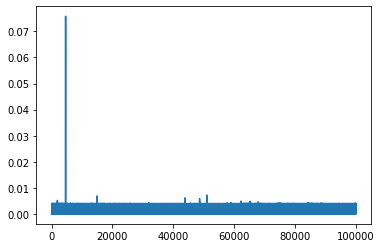

In [14]:
import matplotlib.pyplot as plt

def plot_times(times):
    plt.plot(times)

values = [i for i in range(100000, 0, -1)]
import time
times = []
heap = MinHeap()
for value in values:
    start = time.time()
    heap.add(value)
    end = time.time()
    times.append(end - start)

plot_times(times)

In this file, we've built a type of binary tree called a binary heap. In particular, we implemented a min-heap with a heap designed for keeping track of the minimum value of a dataset. We can add and remove data points, and the minimum always remains available in constant time.

If we want to improve our understanding of heaps, we recommend that try to implement a max-heap. The implementation is very similar, but it keeps the maximum value at the root. The order property of a max-heap is that the value of a node must always be bigger than or equal to the value stored in its children.

In the next three files, we'll learn how to implement B-trees. These trees have the same functionality as binary search trees, but they are much more suited to implement database indexes because their nodes store multiple values at once.